In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

In [181]:
df = pd.read_csv("Data.csv")
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [183]:
df.shape

(10, 4)

In [184]:
for col in df.columns:
    missing_data = df[col].isna().sum()
    rate_missing = missing_data / len(df) * 100
    print("Column ", col , " has ", rate_missing, "% missing data")

Column  Country  has  0.0 % missing data
Column  Age  has  10.0 % missing data
Column  Salary  has  10.0 % missing data
Column  Purchased  has  0.0 % missing data


<Axes: >

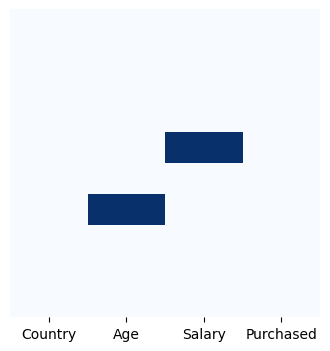

In [185]:
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(df.isna(), cmap="Blues", cbar=False, yticklabels=False)

In [186]:
X = df.iloc[:,:-1].values
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [187]:
y = df.iloc[:, -1:].values
y

array([['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes']], dtype=object)

# Use SimpleImputer to handle missing data

In [188]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # calculate mean to assign NaN values
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [189]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

# Encode Categorical Data

In [190]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cities = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0])], remainder='passthrough')
X = cities.fit_transform(X)
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [191]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(y)
y


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

# Split dataset into train set and test set


In [192]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train1 = X_train.copy()
X_train2 = X_train.copy()
X_test1 = X_test.copy()
X_test2 = X_test.copy()

In [193]:
X_train, X_train.shape

(array([[0.0, 1.0, 0.0, 40.0, 63777.77777777778],
        [1.0, 0.0, 0.0, 37.0, 67000.0],
        [0.0, 0.0, 1.0, 27.0, 48000.0],
        [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
        [1.0, 0.0, 0.0, 48.0, 79000.0],
        [0.0, 0.0, 1.0, 38.0, 61000.0],
        [1.0, 0.0, 0.0, 44.0, 72000.0],
        [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object),
 (8, 5))

In [194]:
y_train, y_train.shape

(array([1, 1, 1, 0, 1, 0, 0, 1]), (8,))

In [195]:
X_test, X_test.shape

(array([[0.0, 1.0, 0.0, 30.0, 54000.0],
        [0.0, 1.0, 0.0, 50.0, 83000.0]], dtype=object),
 (2, 5))

In [196]:
y_test, y_test.shape

(array([0, 0]), (2,))

# Features Scaling

## 1. Standardisation (Chính quy hoá)

### x_stand = ( x - mean(x) ) / standard_deviation(x)
### x_stand ~ R

In [197]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1[:, 3:] = sc.fit_transform(X_train1[:, 3:])

In [198]:
X_train1

array([[0.0, 1.0, 0.0, 0.2630675731713538, 0.1238147854838185],
       [1.0, 0.0, 0.0, -0.25350147960148617, 0.4617563176278856],
       [0.0, 0.0, 1.0, -1.9753983221776195, -1.5309334063940294],
       [0.0, 0.0, 1.0, 0.05261351463427101, -1.1114197802841526],
       [1.0, 0.0, 0.0, 1.6405850472322605, 1.7202971959575162],
       [0.0, 0.0, 1.0, -0.08131179534387283, -0.16751412153692966],
       [1.0, 0.0, 0.0, 0.9518263102018072, 0.9861483502652316],
       [1.0, 0.0, 0.0, -0.5978808481167128, -0.48214934111933727]],
      dtype=object)

In [199]:
X_test1[:, 3:] = sc.transform(X_test1[:, 3:])
X_test1

array([[0.0, 1.0, 0.0, -1.4588292694047795, -0.9016629672292141],
       [0.0, 1.0, 0.0, 1.984964415747487, 2.139810822067393]],
      dtype=object)

## 2. Normolisation (Tiêu chuẩn hoá)

### x_norm = ( x - min(x) ) / max(x) - min(x)
### x_norm ~ [0,1]

In [200]:
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
X_train2[:, 3:] = mmc.fit_transform(X_train2[:, 3:])

In [201]:
X_train2

array([[0.0, 1.0, 0.0, 0.6190476190476191, 0.5089605734767026],
       [1.0, 0.0, 0.0, 0.4761904761904763, 0.612903225806452],
       [0.0, 0.0, 1.0, 0.0, 0.0],
       [0.0, 0.0, 1.0, 0.5608465608465609, 0.12903225806451624],
       [1.0, 0.0, 0.0, 1.0, 1.0],
       [0.0, 0.0, 1.0, 0.5238095238095237, 0.4193548387096775],
       [1.0, 0.0, 0.0, 0.8095238095238093, 0.774193548387097],
       [1.0, 0.0, 0.0, 0.38095238095238093, 0.3225806451612905]],
      dtype=object)

In [202]:
X_test2[:, 3:] = mmc.transform(X_test2[:, 3:])
X_test2

array([[0.0, 1.0, 0.0, 0.1428571428571428, 0.19354838709677424],
       [0.0, 1.0, 0.0, 1.0952380952380953, 1.1290322580645165]],
      dtype=object)